   ### About Dataset
   
   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 
 
  ### Features:
   #### Bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self employed","retired","technician","services") 
   * 3 - marital :
       marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "unknown","secondary","primary","tertiary")
   * 5 - default: has credit in default? (binary: "yes","no")
   * 6 - balance: average yearly balance, in euros (numeric) 
   * 7 - housing: has housing loan? (binary: "yes","no")
   * 8 - loan: has personal loan? (binary: "yes","no")
#### Related with the last contact of the current campaign:
   * 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   * 10 - day: last contact day of the month (numeric)
   * 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   * 12 - duration: last contact duration, in seconds (numeric)
#### Other attributes:
   * 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
   * 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric,
   -1 means client was not previously contacted)
   * 15 - previous: number of contacts performed before this campaign and for this client (numeric)
   * 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (desired target):
   * 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

np.set_printoptions(precision=4)

### Loading Data

In [2]:
data = pd.read_csv('bank/bank.csv', sep= ';')
print(data.shape)
data.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Text(0.5, 0, 'Target Variable')

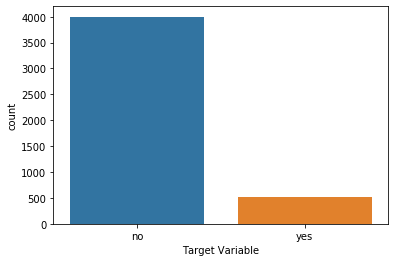

In [5]:
sns.countplot(data['y'])
plt.xlabel('Target Variable')

In [6]:
data['y'] = np.where(data['y'] == 'yes', 1,0)
data['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [7]:
data_copy = data.copy()

In [8]:
data_copy['job'] = data_copy['job'].astype('category').cat.codes
data_copy['marital'] = data_copy['marital'].astype('category').cat.codes
data_copy['education'] = data_copy['education'].astype('category').cat.codes
data_copy['contact'] = data_copy['contact'].astype('category').cat.codes
data_copy['poutcome'] = data_copy['poutcome'].astype('category').cat.codes
data_copy['month'] = data_copy['month'].astype('category').cat.codes
data_copy['default'] = data_copy['default'].astype('category').cat.codes
data_copy['loan'] = data_copy['loan'].astype('category').cat.codes
data_copy['housing'] = data_copy['housing'].astype('category').cat.codes

In [9]:
def count_plotter(independent, dependent, df):
    plt.figure(figsize=(21,7))
    sns.countplot(df[independent], hue = df[dependent])
    plt.title('Count Plot of ' + independent + ' vs target variable')

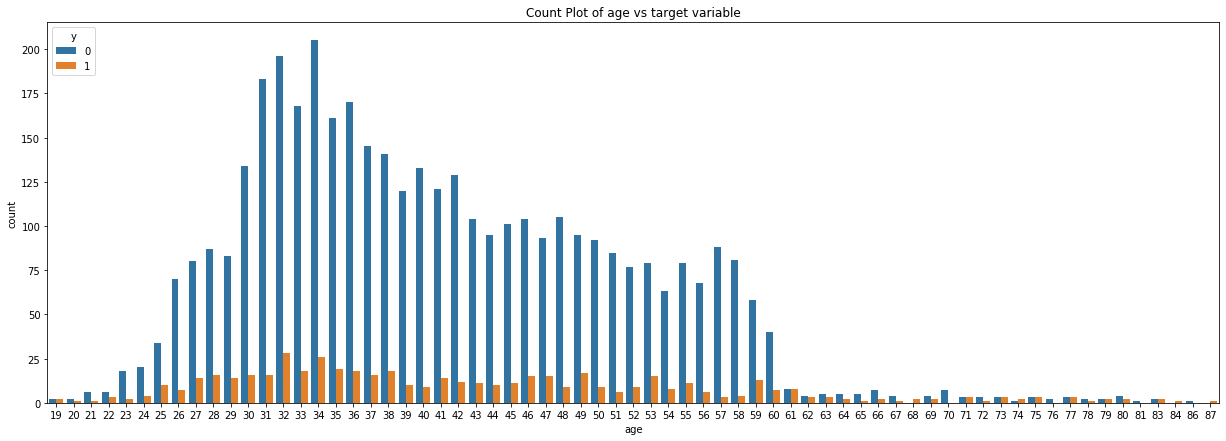

In [10]:
count_plotter('age', 'y', data)

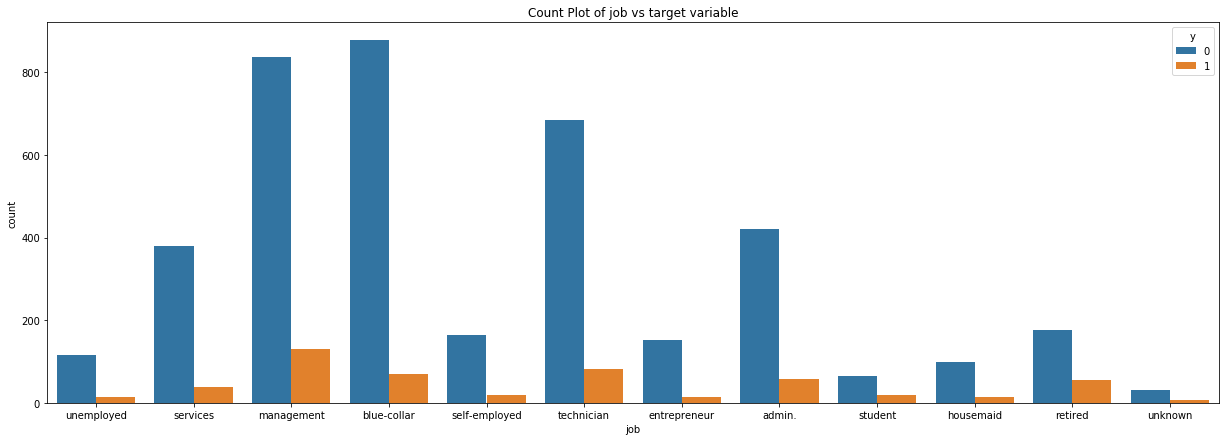

In [11]:
count_plotter('job', 'y', data)

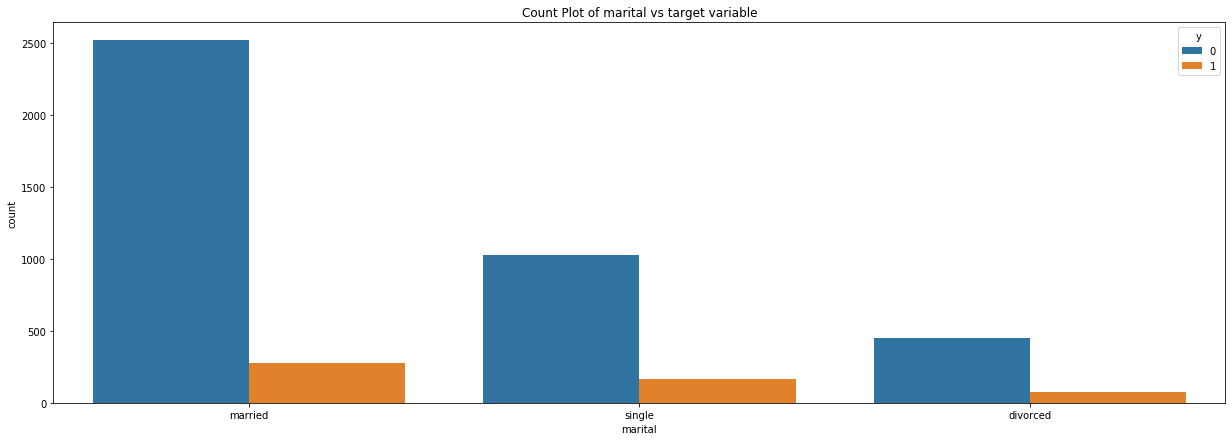

In [12]:
count_plotter('marital', 'y', data)

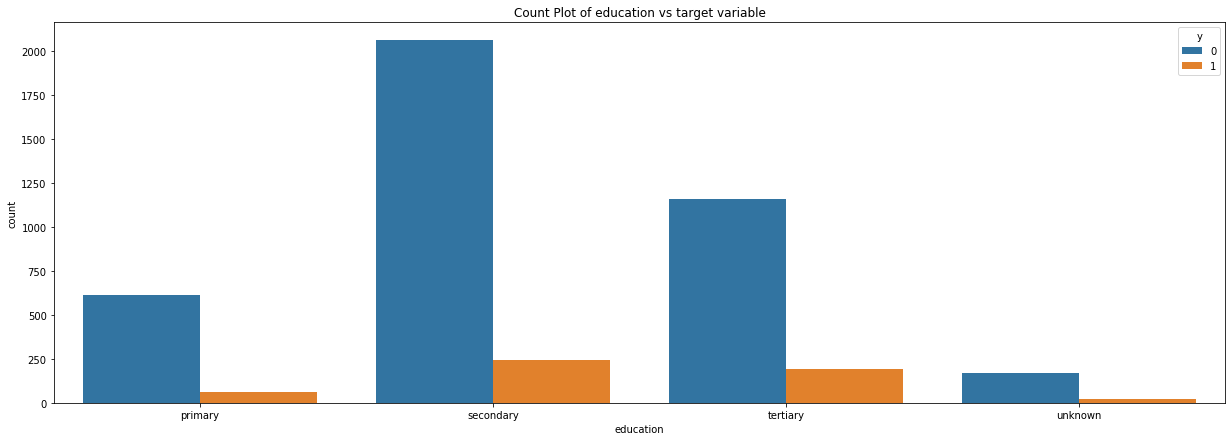

In [13]:
count_plotter('education', 'y', data)

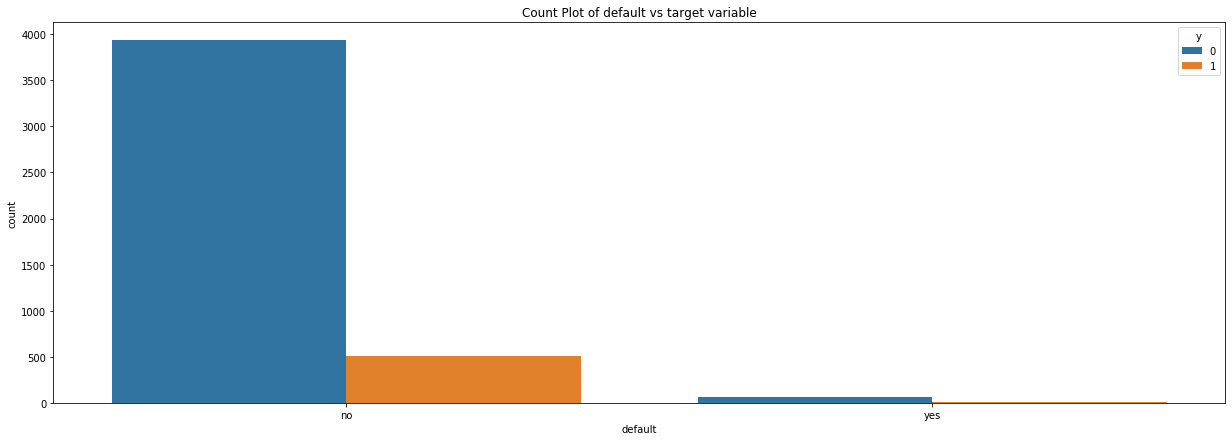

In [14]:
count_plotter('default', 'y', data)

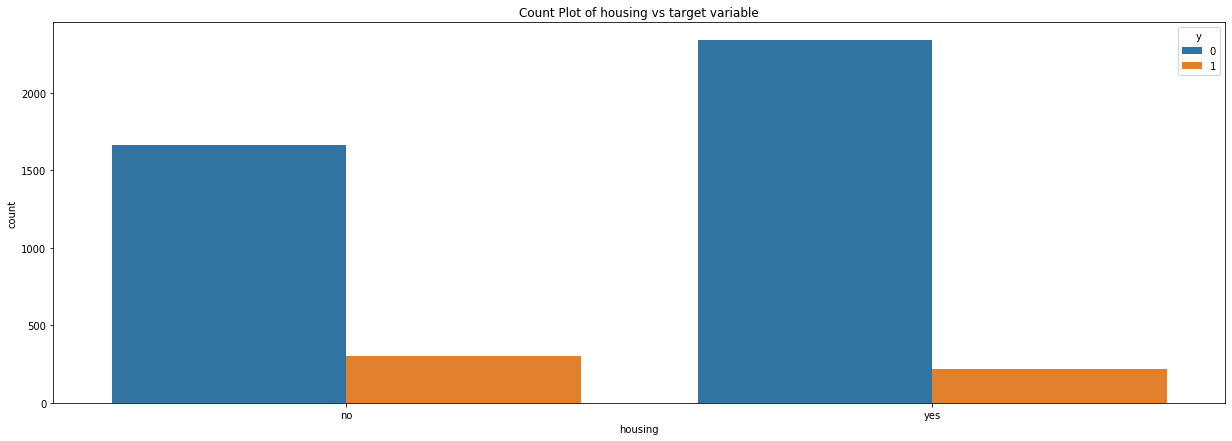

In [16]:
count_plotter('housing', 'y', data)

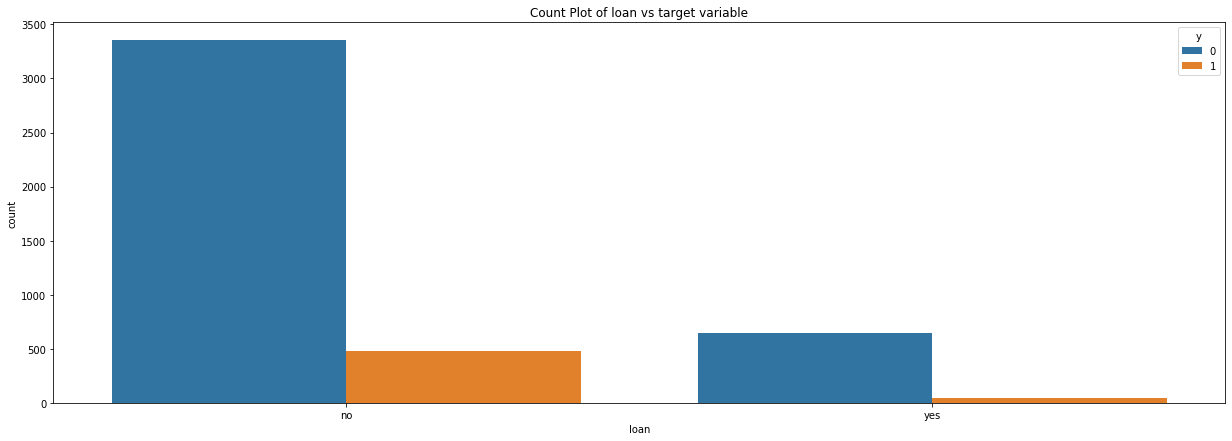

In [17]:
count_plotter('loan', 'y', data)

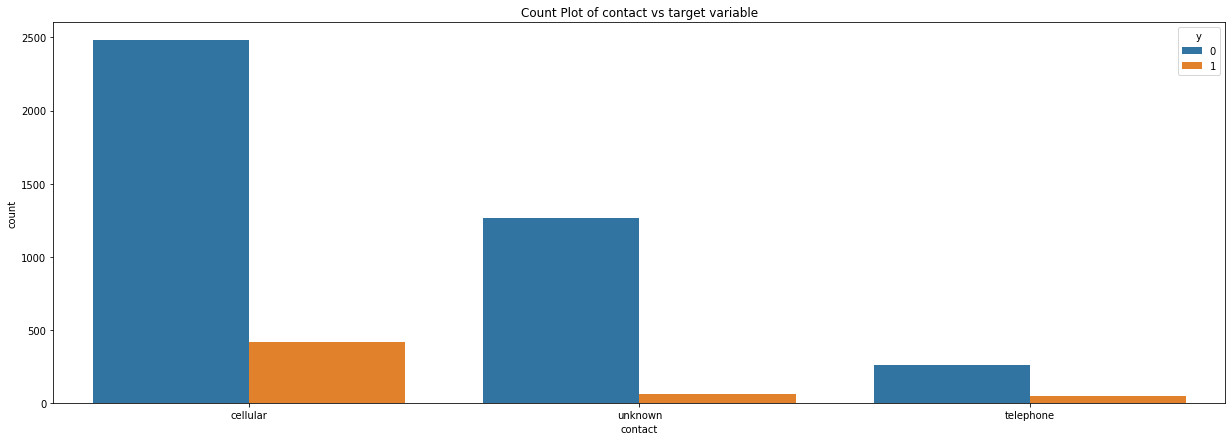

In [18]:
count_plotter('contact', 'y', data)

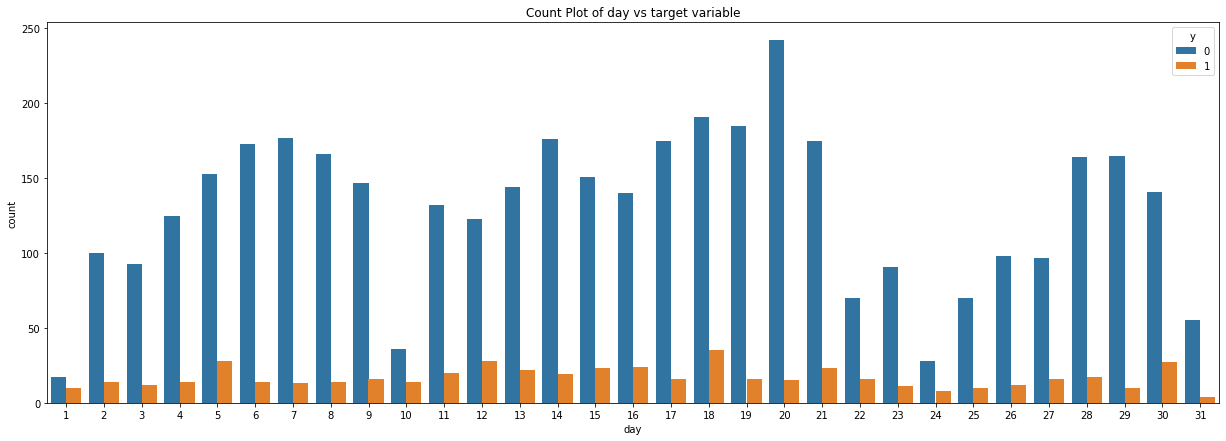

In [19]:
count_plotter('day', 'y', data)

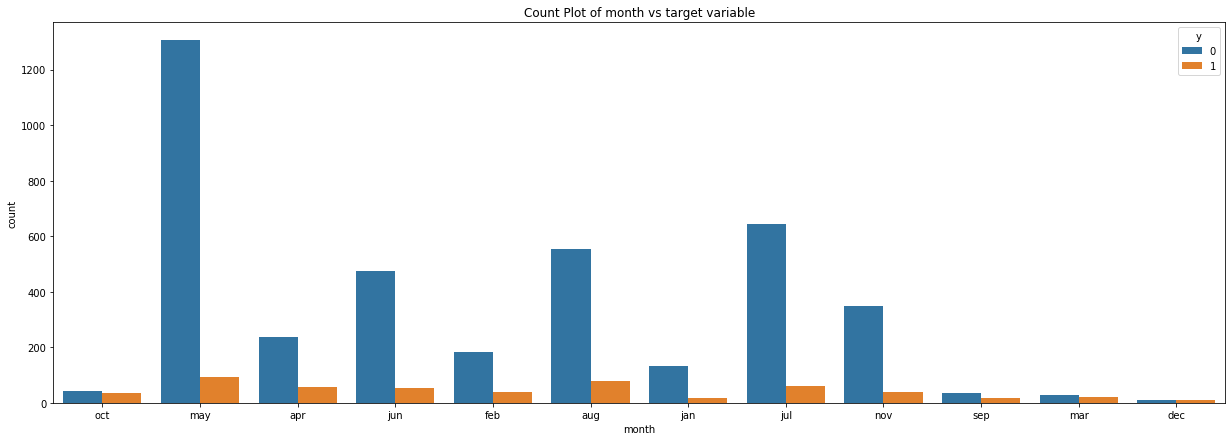

In [20]:
count_plotter('month', 'y', data)

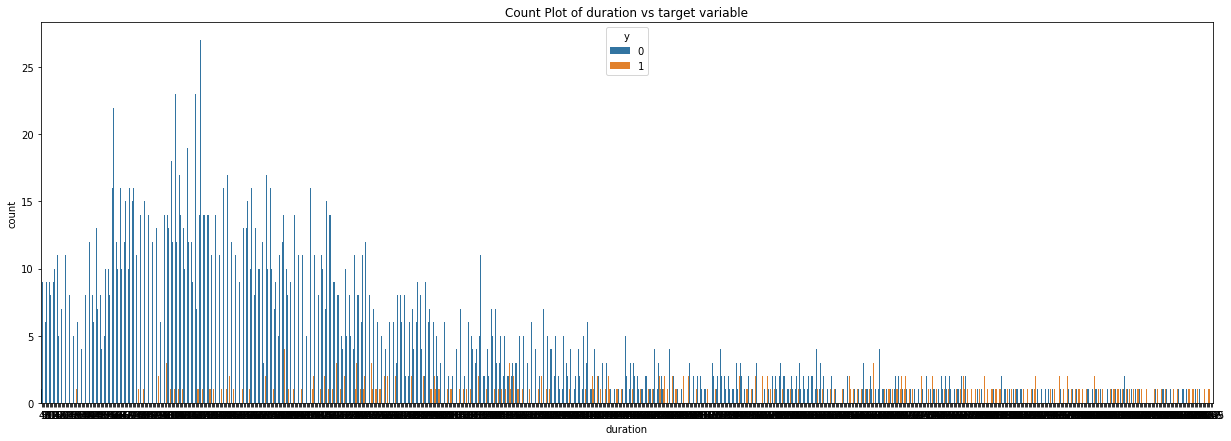

In [21]:
count_plotter('duration', 'y', data)

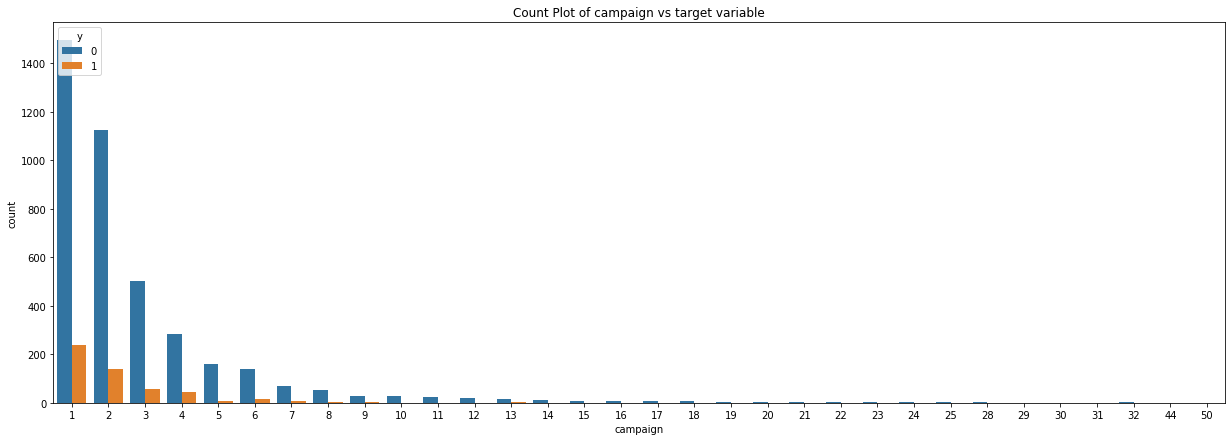

In [22]:
count_plotter('campaign', 'y', data)

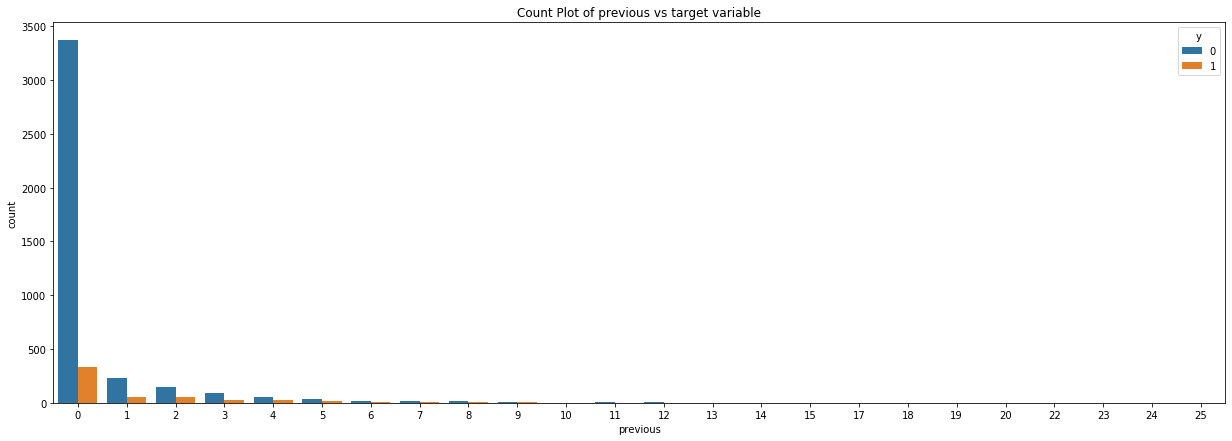

In [24]:
count_plotter('previous', 'y', data)

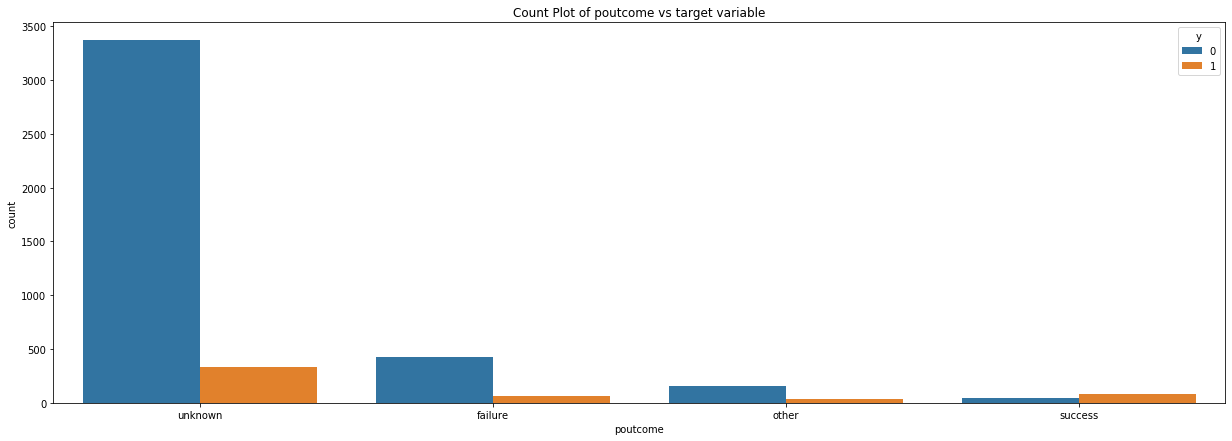

In [25]:
count_plotter('poutcome', 'y', data)

### Feature Importance

([<matplotlib.axis.YTick at 0x1a19f20990>,
 <a list of 16 Text yticklabel objects>)

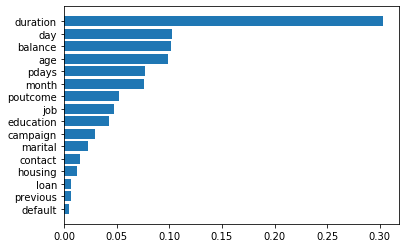

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(data_copy.drop('y', 1), data_copy['y'].values.ravel())
importance = clf.feature_importances_
feature_names = data_copy.drop('y', axis=1).columns

plt.barh(range(len(np.argsort(importance))), importance[np.argsort(importance)])
plt.yticks(range(len(np.argsort(importance))), feature_names[np.argsort(importance)])


We are considering following features based on the above graph:
* duration
* day
* balance
* age
* pdays
* month
* poutcome
* job

In [27]:
data_filtered = data[['duration', 'balance', 'month', 'age', 'day', 'pdays', 'poutcome', 'job', 'y']]
    
num_cols = data_filtered.columns[data_filtered.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['duration', 'balance', 'age', 'day', 'pdays', 'y'], dtype='object')

### Splitting data into Dependent and Independent variable

In [28]:
data_y = data_filtered['y'].values.ravel()
data_x = data_filtered.drop('y', 1)

In [29]:
np.unique(data_y)

array([0, 1])

### Creating dummies for categorical variables

In [30]:
data_x = pd.get_dummies(data_x, sparse=True)
data_x.head()

,duration,balance,age,day,pdays,month_apr,month_aug,month_dec,month_feb,month_jan,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,79,1787,30,19,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,220,4789,33,11,339,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,185,1350,35,16,330,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,199,1476,30,3,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,226,0,59,5,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting data into train and test

In [31]:
data_train_x1, data_test_x, data_train_y1, data_test_y = train_test_split(data_x, data_y, random_state = 10)
print(data_train_x1.shape)
print(data_test_x.shape)

(3390, 33)
(1131, 33)


In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
data_train_x, data_train_y = smote.fit_resample(data_train_x1, data_train_y1)

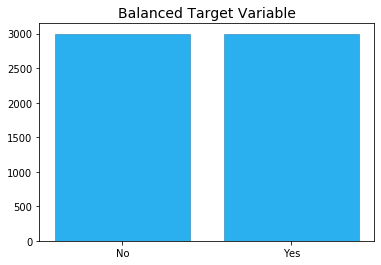

In [33]:
plt.bar(['No','Yes'], [sum(data_train_y), len(data_train_y)-sum(data_train_y)], facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Balanced Target Variable', fontsize=14)
plt.show()

### Standardizing data

In [34]:
scaler = StandardScaler()
data_train_x = scaler.fit_transform(data_train_x)
data_test_x = scaler.transform(data_test_x)

## 1. Different Models

### Support Vector Machine

In [35]:
from sklearn.svm import SVC
params = {'C': [10**i for i in range(-4, 5)] ,'max_iter':[1000,10000]}
grid = GridSearchCV(SVC(kernel = 'linear'), params, cv = 5)
grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'C': 0.1, 'max_iter': 10000}
Best estimtor: SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best score: 0.9158248540450374


In [36]:
svc_linear = SVC(kernel = 'linear', C = 0.1, degree = 3, random_state = 1)
svc_linear.fit(data_train_x, np.ravel(data_train_y))
pred_train = svc_linear.predict(data_train_x)
pred_test = svc_linear.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

Confusion matrix:
 [[987  14]
 [109  21]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1001
           1       0.60      0.16      0.25       130

    accuracy                           0.89      1131
   macro avg       0.75      0.57      0.60      1131
weighted avg       0.87      0.89      0.86      1131



In [37]:
#Create a dataframe to store all the model outputs
model_output = pd.DataFrame(index=None, columns=['Model','Train_Accuracy', 'Test_Accuracy'])

In [38]:
model_output = model_output.append(pd.Series({'Model' : 'SVM Linear', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

In [39]:
params = {'C': [10**i for i in range(-4, 5)] ,'max_iter':[1000,10000]}
grid = GridSearchCV(SVC(kernel = 'rbf'), params, cv = 5)
grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'C': 1, 'max_iter': 10000}
Best estimtor: SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best score: 0.9209920767306088


In [40]:
svc_rbf = SVC(kernel = 'rbf', C = 1, degree = 3,  random_state = 1)
svc_rbf.fit(data_train_x, np.ravel(data_train_y))
pred_train = svc_rbf.predict(data_train_x)
pred_test = svc_rbf.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))
model_output = model_output.append(pd.Series({'Model' : 'SVM RBF', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[978  23]
 [107  23]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1001
           1       0.50      0.18      0.26       130

    accuracy                           0.89      1131
   macro avg       0.70      0.58      0.60      1131
weighted avg       0.86      0.89      0.86      1131



### Decision Trees

In [41]:
from sklearn.tree import DecisionTreeClassifier
params = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv = 5)
grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'criterion': 'entropy', 'max_depth': 14}
Best estimtor: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best score: 0.9116497080900752


In [42]:
decision_tree = DecisionTreeClassifier(max_depth = 14, criterion = 'entropy',  random_state = 1)
decision_tree.fit(data_train_x, np.ravel(data_train_y))
pred_train = decision_tree.predict(data_train_x)
pred_test = decision_tree.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))
model_output = model_output.append(pd.Series({'Model' : 'Decision Tree', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[911  90]
 [ 80  50]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1001
           1       0.36      0.38      0.37       130

    accuracy                           0.85      1131
   macro avg       0.64      0.65      0.64      1131
weighted avg       0.85      0.85      0.85      1131



### Logistic Regression

In [43]:
from sklearn.linear_model  import LogisticRegression
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid = GridSearchCV(LogisticRegression(), params, cv = 5)
grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'C': 100.0, 'penalty': 'l2'}
Best estimtor: LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best score: 0.9186576313594662


In [44]:
logistic = LogisticRegression(C = 100, penalty = 'l2',  random_state = 1)
logistic.fit(data_train_x, np.ravel(data_train_y))
pred_train = logistic.predict(data_train_x)
pred_test = logistic.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))
model_output = model_output.append(pd.Series({'Model' : 'Logistic Regression', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[966  35]
 [ 84  46]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1001
           1       0.57      0.35      0.44       130

    accuracy                           0.89      1131
   macro avg       0.74      0.66      0.69      1131
weighted avg       0.88      0.89      0.88      1131



### Random Forest

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'max_features' : ["auto", "sqrt", "log2"],}
grid = RandomizedSearchCV(RandomForestClassifier(n_estimators = 1000), params, cv = 5)
grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy'}
Best estimtor: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=14, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best score: 0.9309892966360855


In [46]:
random_forest = RandomForestClassifier(max_depth = 14, criterion = 'entropy', max_features = 'log2', 
                                       random_state = 1)
random_forest.fit(data_train_x, np.ravel(data_train_y))
pred_train = random_forest.predict(data_train_x)
pred_test = random_forest.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))
model_output = model_output.append(pd.Series({'Model' : 'Random Forest', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[935  66]
 [ 66  64]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1001
           1       0.49      0.49      0.49       130

    accuracy                           0.88      1131
   macro avg       0.71      0.71      0.71      1131
weighted avg       0.88      0.88      0.88      1131



## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
params = {'metric': ['minkowski','euclidean','manhattan'], 'weights' : ['uniform','distance'], 
          'n_neighbors'  : range(5,100) }
grid = RandomizedSearchCV(KNeighborsClassifier(), params, cv = 5)
grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'weights': 'distance', 'n_neighbors': 19, 'metric': 'minkowski'}
Best estimtor: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')
Best score: 0.9293269391159299


In [48]:
knn = KNeighborsClassifier(metric = 'minkowski', weights = 'distance', n_neighbors = 19)
knn.fit(data_train_x, np.ravel(data_train_y))
pred_train = knn.predict(data_train_x)
pred_test = knn.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

Confusion matrix:
 [[954  47]
 [ 97  33]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1001
           1       0.41      0.25      0.31       130

    accuracy                           0.87      1131
   macro avg       0.66      0.60      0.62      1131
weighted avg       0.85      0.87      0.86      1131



In [49]:
model_output = model_output.append(pd.Series({'Model' : 'KNN', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)
model_output

,Model,Train_Accuracy,Test_Accuracy
0,SVM Linear,0.929977,0.891247
1,SVM RBF,0.949817,0.885057
2,Decision Tree,0.989330,0.849691
3,Logistic Regression,0.935812,0.894783
4,Random Forest,0.993831,0.883289
5,KNN,1.000000,0.872679


## 2. Bagging & Boosting

### Linear SVM with Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(svc_linear, max_features = 15, bootstrap = True, oob_score = True, n_estimators = 100, 
                           random_state = 1)
bagging.fit(data_train_x, np.ravel(data_train_y))
pred_train = bagging.predict(data_train_x)
pred_test = bagging.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'SVM with Bagging', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)
model_output

Confusion matrix:
 [[921  80]
 [ 57  73]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1001
           1       0.48      0.56      0.52       130

    accuracy                           0.88      1131
   macro avg       0.71      0.74      0.72      1131
weighted avg       0.89      0.88      0.88      1131



,Model,Train_Accuracy,Test_Accuracy
0,SVM Linear,0.929977,0.891247
1,SVM RBF,0.949817,0.885057
2,Decision Tree,0.989330,0.849691
3,Logistic Regression,0.935812,0.894783
4,Random Forest,0.993831,0.883289
5,KNN,1.000000,0.872679
6,SVM with Bagging,0.924308,0.878868


## Kernelized SVM

In [51]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(svc_rbf, max_features = 15, bootstrap = True, oob_score = True, n_estimators = 100, 
                           random_state = 1)
bagging.fit(data_train_x, np.ravel(data_train_y))
pred_train = bagging.predict(data_train_x)
pred_test = bagging.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'SVM-RBF with Bagging', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[946  55]
 [ 84  46]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1001
           1       0.46      0.35      0.40       130

    accuracy                           0.88      1131
   macro avg       0.69      0.65      0.66      1131
weighted avg       0.87      0.88      0.87      1131



### Decision tree with Bagging

In [52]:
bagging = BaggingClassifier(decision_tree, max_features = 15, bootstrap = True, oob_score = True, n_estimators = 30, 
                           random_state = 1)
bagging.fit(data_train_x, np.ravel(data_train_y))
pred_train = bagging.predict(data_train_x)
pred_test = bagging.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'Decision Tree with Bagging', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[929  72]
 [ 62  68]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1001
           1       0.49      0.52      0.50       130

    accuracy                           0.88      1131
   macro avg       0.71      0.73      0.72      1131
weighted avg       0.89      0.88      0.88      1131



### Logistic Regression with Bagging

In [53]:
bagging = BaggingClassifier(logistic, max_features = 15, bootstrap = True, oob_score = True, n_estimators = 30, 
                           random_state = 1)
bagging.fit(data_train_x, np.ravel(data_train_y))
pred_train = bagging.predict(data_train_x)
pred_test = bagging.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'Logistic Reg with Bagging', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[926  75]
 [ 61  69]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1001
           1       0.48      0.53      0.50       130

    accuracy                           0.88      1131
   macro avg       0.71      0.73      0.72      1131
weighted avg       0.89      0.88      0.88      1131



## Random Forest with Bagging

In [54]:
bagging = BaggingClassifier(random_forest, max_features = 15, bootstrap = True, oob_score = True, n_estimators = 30, 
                           random_state = 1)
bagging.fit(data_train_x, np.ravel(data_train_y))
pred_train = bagging.predict(data_train_x)
pred_test = bagging.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'RF with Bagging', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[926  75]
 [ 67  63]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1001
           1       0.46      0.48      0.47       130

    accuracy                           0.87      1131
   macro avg       0.69      0.70      0.70      1131
weighted avg       0.88      0.87      0.88      1131



## KNN with Bagging

In [55]:
bagging = BaggingClassifier(knn, max_features = 15, bootstrap = True, oob_score = True, n_estimators = 30, 
                           random_state = 1)
bagging.fit(data_train_x, np.ravel(data_train_y))
pred_train = bagging.predict(data_train_x)
pred_test = bagging.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'KNN with Bagging', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[940  61]
 [ 72  58]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1001
           1       0.49      0.45      0.47       130

    accuracy                           0.88      1131
   macro avg       0.71      0.69      0.70      1131
weighted avg       0.88      0.88      0.88      1131



### Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

params = {'learning_rate': [1, 0.1, 0.01, 0.05],'max_depth': [2,3,4],'max_features':['auto', 'log2']}
grid = GridSearchCV(GradientBoostingClassifier(n_estimators= 200,random_state = 1), params, cv=5)
grid.fit(data_train_x, data_train_y)
print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2'}
Best estimtor: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Best score: 0.9228229079788713


In [57]:
gbc = GradientBoostingClassifier(learning_rate = 0.1 , max_depth = 4 , max_features = 'log2')
gbc.fit(data_train_x, np.ravel(data_train_y))
pred_train = gbc.predict(data_train_x)
pred_test = gbc.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'Gradient Boosting', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)
model_output

Confusion matrix:
 [[917  84]
 [ 67  63]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1001
           1       0.43      0.48      0.45       130

    accuracy                           0.87      1131
   macro avg       0.68      0.70      0.69      1131
weighted avg       0.87      0.87      0.87      1131



,Model,Train_Accuracy,Test_Accuracy
0,SVM Linear,0.929977,0.891247
1,SVM RBF,0.949817,0.885057
2,Decision Tree,0.989330,0.849691
3,Logistic Regression,0.935812,0.894783
4,Random Forest,0.993831,0.883289
5,KNN,1.000000,0.872679
6,SVM with Bagging,0.924308,0.878868
7,SVM-RBF with Bagging,0.931811,0.877100
8,Decision Tree with Bagging,0.996999,0.881521
9,Logistic Reg with Bagging,0.923641,0.879752


## 3. PCA

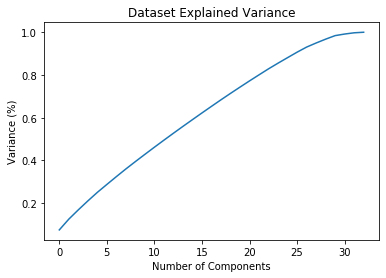

In [61]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_train_x)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

#### PCA doesn't make sense here as the data doesn't have really high dimension.

## ADABoost

In [65]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'learning_rate':[1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(AdaBoostClassifier(base_estimator = svc_linear, random_state = 1, algorithm='SAMME'),
                            param_grid, cv = 5,return_train_score=True)
grid.fit(data_train_x, data_train_y)

print('Best parameters:  {}'.format(grid.best_params_))
print('Best estimtor: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))

Best parameters:  {'learning_rate': 1}
Best estimtor: AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=-1, probability=False,
                                      random_state=1, shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1, n_estimators=50, random_state=1)
Best score: 0.6321665276619405


In [66]:
adaboost = AdaBoostClassifier(base_estimator = svc_linear, random_state = 1, algorithm='SAMME', 
                                 learning_rate = 1)
adaboost.fit(data_train_x, np.ravel(data_train_y))

pred_train = adaboost.predict(data_train_x)
pred_test = adaboost.predict(data_test_x)
print('Confusion matrix:\n', confusion_matrix(data_test_y, pred_test))
train_accuracy = metrics.accuracy_score(data_train_y, pred_train)
test_accuracy = metrics.accuracy_score(data_test_y, pred_test)
print(classification_report(data_test_y,pred_test))

model_output = model_output.append(pd.Series({'Model' : 'AdaBoost w Linear SVC', 'Train_Accuracy' : train_accuracy, 
                                              'Test_Accuracy' : test_accuracy}),ignore_index=True)

Confusion matrix:
 [[995   6]
 [107  23]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1001
           1       0.79      0.18      0.29       130

    accuracy                           0.90      1131
   macro avg       0.85      0.59      0.62      1131
weighted avg       0.89      0.90      0.87      1131



In [76]:
model_output

,Model,Train_Accuracy,Test_Accuracy
0,SVM Linear,0.929977,0.891247
1,SVM RBF,0.949817,0.885057
2,Decision Tree,0.989330,0.849691
3,Logistic Regression,0.935812,0.894783
4,Random Forest,0.993831,0.883289
5,KNN,1.000000,0.872679
6,SVM with Bagging,0.924308,0.878868
7,SVM-RBF with Bagging,0.931811,0.877100
8,Decision Tree with Bagging,0.996999,0.881521
9,Logistic Reg with Bagging,0.923641,0.879752


### Conclusion



The best classification model for this dataset is logistic regression. It gives the highest test accuracy compared to all other models.